## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set_theme()

In [3]:
raw_data = pd.read_csv("real_life_example.csv")

raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


#### Because the model column make analysis harder and it need 312 dummies we will remove the column

In [6]:
raw_data = raw_data.drop(['Model'], axis=1)
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


#### We have been noticed that some rows are missing price values and other so we will check if the sum of null variable isn't the thing to make the linear regression bad we will remove it.

In [7]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
raw_data = raw_data.dropna()
raw_data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

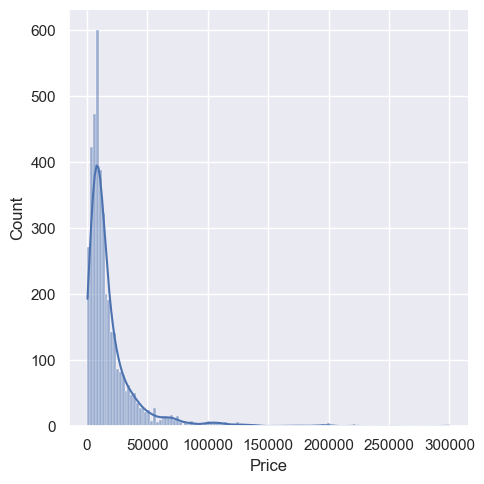

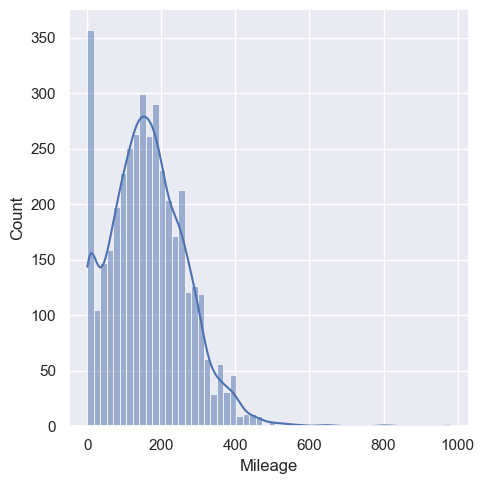

In [9]:
sns.displot(raw_data['Price'], kde=True)
sns.displot(raw_data['Mileage'], kde=True)

#### The price and Mileage columns have outliers that far from the mean, you can notice it by visual graph or by the descriptive analysis you did by describe method, so we are gonnna cut the outliers by 99 percent quantile

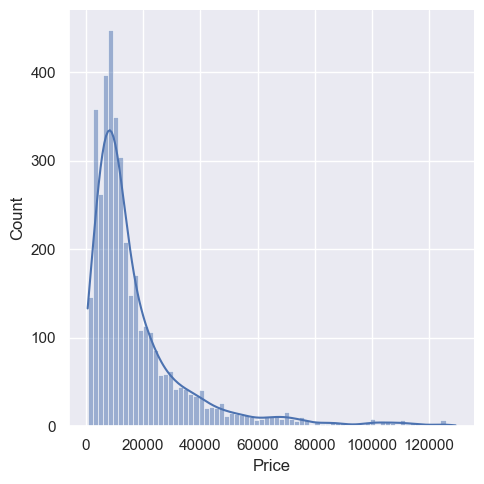

In [18]:
q = raw_data['Price'].quantile(0.99)
data_1 = raw_data[raw_data['Price'] < q]
sns.displot(data_1['Price'], kde=True)

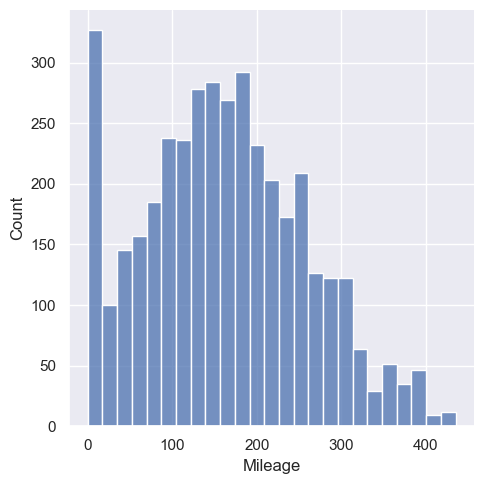

In [20]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]
sns.displot(data_2['Mileage'])

#### According to resources, there is no engine volume greater than 6.5, so we are gonna remove rows having bigger engine volumes

In [22]:
data_cleaned = data_2[data_2['EngineV'] < 6.5]
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,17988.421311,161.279776,2.443497,2006.406019
std,19041.658686,96.068269,0.946198,6.595871
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2008.000000
75%,21500.000000,229.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


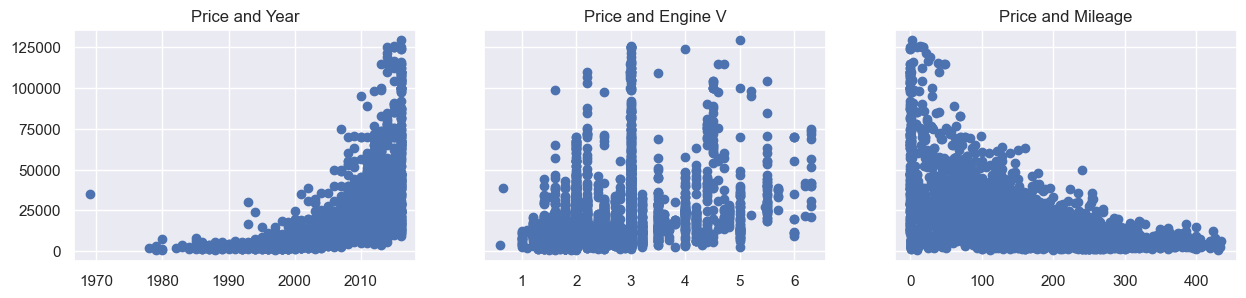

In [23]:
f, (ax1, ax2, ax3) =plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title("Price and Engine V")
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title("Price and Mileage")

plt.show()

In [26]:
# Use .loc[row_indexer, col_indexer]
data_cleaned.loc[:, 'log_price'] = np.log(data_cleaned['Price'])


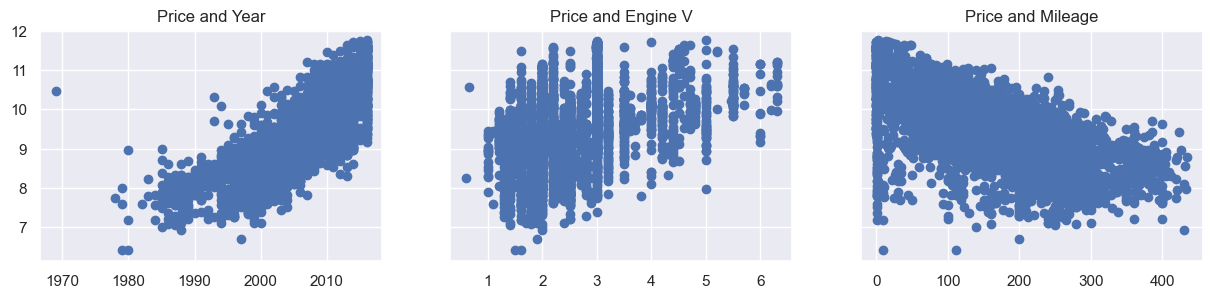

In [27]:
f, (ax1, ax2, ax3) =plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title("Price and Engine V")
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title("Price and Mileage")

plt.show()

#### No Multicolinarity

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
variables = data_cleaned[['EngineV', 'Year', 'Mileage']]
vif_data["Feature"] = variables.columns
vif_data["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif_data

,Feature,VIF
0,EngineV,7.671170
1,Year,10.397185
2,Mileage,3.791073


#### Because Year has VIF greater than 6 we will remove it.

In [41]:
data_cleaned = data_cleaned.drop(['Year'], axis=1)
data_cleaned = data_cleaned.drop(['Price'], axis=1)

In [42]:
data_cleaned.describe(include="all")

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
count,3921,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,6,NaN,NaN,4,2,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,1499,NaN,NaN,1818,3559,NaN
mean,NaN,NaN,161.279776,2.443497,NaN,NaN,9.393354
std,NaN,NaN,96.068269,0.946198,NaN,NaN,0.893937
min,NaN,NaN,0.000000,0.600000,NaN,NaN,6.396930
25%,NaN,NaN,92.000000,1.800000,NaN,NaN,8.853665
50%,NaN,NaN,158.000000,2.200000,NaN,NaN,9.350102
75%,NaN,NaN,229.000000,3.000000,NaN,NaN,9.975808


In [43]:
data_no_multicolinarity = data_cleaned

### As we know for categorical features we have to have dummies and the panda package provide us with that automatically.

In [47]:
data_with_dummies = pd.get_dummies(data_no_multicolinarity, drop_first= True)

In [48]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [49]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

#### Rearrange columns so the target should be first

cols = ['log_price', 'Mileage', 'EngineV','Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

pre_processed_data = data_with_dummies[cols]

In [51]:
pre_processed_data.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


## Create Linear Regression

#### Scale data

In [61]:
target = pre_processed_data['log_price']
inputs = pre_processed_data.drop(['log_price'], axis=1)
target

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
          ...    
4339     9.792556
4340    11.736069
4341     8.779557
4342     8.987197
4344     9.510445
Name: log_price, Length: 3921, dtype: float64

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_inputs = scaler.fit_transform(inputs)
scaled_inputs

array([[ 1.20471603, -0.46877392,  2.28556547, ..., -0.16342754,
         1.32786051,  0.31892627],
       [ 2.76630482,  0.48252214, -0.43752849, ..., -0.16342754,
        -0.75309115,  0.31892627],
       [ 2.04797398,  2.70221295, -0.43752849, ..., -0.16342754,
        -0.75309115,  0.31892627],
       ...,
       [-1.66860734,  1.11671952,  2.28556547, ..., -0.16342754,
         1.32786051,  0.31892627],
       [ 0.3406369 , -0.46877392,  2.28556547, ..., -0.16342754,
         1.32786051,  0.31892627],
       [-0.38810453, -0.46877392, -0.43752849, ..., -0.16342754,
        -0.75309115,  0.31892627]], shape=(3921, 17))

#### split data

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, target, test_size=0.2, random_state=786)

In [63]:
reg = LinearRegression()
reg.fit(x_train,y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [65]:
y_hat = reg.predict(x_train)


Text(0.5, 1.0, 'Y train vs Y Hat')

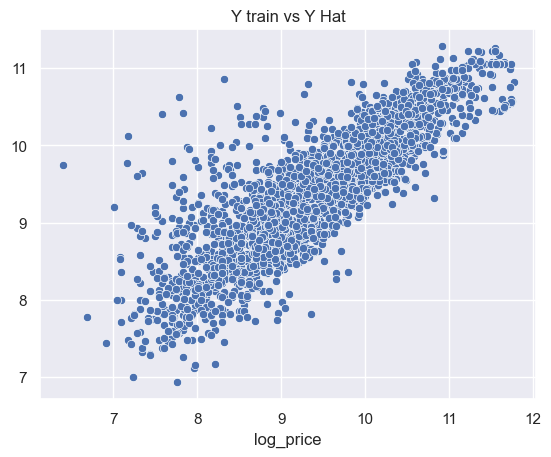

In [67]:
sns.scatterplot(x=y_train, y=y_hat)
plt.title("Y train vs Y Hat")


Text(0.5, 1.0, 'Residual PDF')

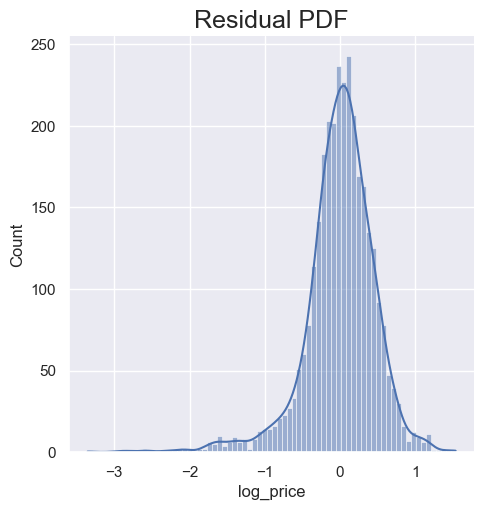

In [70]:
sns.displot(y_train - y_hat, kde=True)
plt.title("Residual PDF", size=18)

In [71]:
reg.score(x_train,y_train)

0.7200080553684305

In [72]:
reg.coef_

array([-4.51316044e-01,  2.19209401e-01,  1.25903788e-02, -3.93974670e-04,
       -1.39079553e-01, -1.85651519e-01, -6.19343580e-02, -9.62015565e-02,
       -1.54671790e-01, -9.64743167e-02, -2.03835694e-01, -1.26092377e-01,
       -1.54401706e-01, -1.25036882e-01, -2.75565312e-02, -1.47086772e-01,
        3.08693724e-01])

In [73]:
reg.intercept_

np.float64(9.387188310663566)

In [74]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=["Features"])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.451316
1,EngineV,0.219209
2,Brand_BMW,0.012590
3,Brand_Mercedes-Benz,-0.000394
4,Brand_Mitsubishi,-0.139080
5,Brand_Renault,-0.185652
6,Brand_Toyota,-0.061934
7,Brand_Volkswagen,-0.096202
8,Body_hatch,-0.154672
9,Body_other,-0.096474


In [75]:
y_hat_test = reg.predict(x_test)

Text(0.5, 1.0, 'Y Test vs Y Hat Test')

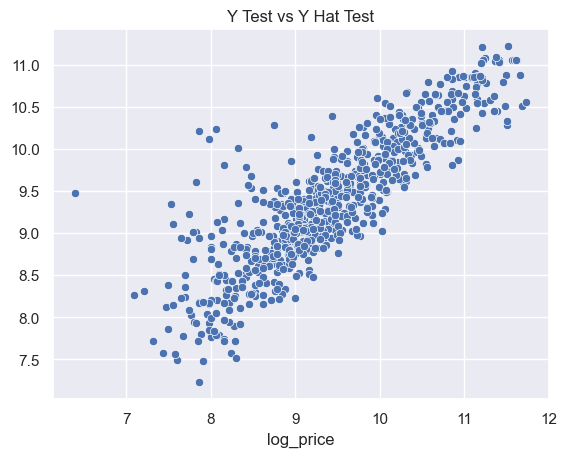

In [76]:
sns.scatterplot(x=y_test, y=y_hat_test)
plt.title("Y Test vs Y Hat Test")


In [79]:
y_test = y_test.reset_index(drop=True)

In [82]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=["Predictions"])

In [86]:
df_pf['Target'] = np.exp(y_test)

In [95]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']
df_pf['Diference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Diference%
0,"15,239.64","28,500.00","13,260.36",46.53
1,"51,502.27","56,000.00","4,497.73",8.03
2,"4,714.84","3,100.00","-1,614.84",52.09
3,"63,329.95","89,999.00","26,669.05",29.63
4,"13,049.38","13,900.00",850.62,6.12
...,...,...,...,...
780,"15,395.66","20,350.00","4,954.34",24.35
781,"9,506.86","10,300.00",793.14,7.70
782,"8,510.41","10,000.00","1,489.59",14.90
783,"31,460.35","21,999.00","-9,461.35",43.01


In [96]:
df_pf.describe()

,Predictions,Target,Residual,Diference%
count,785.00,785.00,785.00,785.00
mean,"15,915.88","19,026.91","3,111.03",40.48
std,"13,390.54","21,051.58","11,239.09",101.99
min,"1,375.47",600.00,"-24,774.21",0.08
25%,"7,284.86","6,900.00","-1,487.69",10.77
50%,"11,188.79","11,100.00",615.49,22.85
75%,"19,428.65","21,999.00","3,865.30",40.86
max,"74,493.06","125,000.00","86,780.91","2,082.45"


In [97]:
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 999
df_pf.sort_values(by='Diference%')

,Predictions,Target,Residual,Diference%
576,"10,608.72","10,600.00",-8.72,0.08
135,"28,375.59","28,350.00",-25.59,0.09
615,"17,479.03","17,500.00",20.97,0.12
21,"18,354.74","18,300.00",-54.74,0.30
759,"14,794.34","14,750.00",-44.34,0.30
475,"14,746.11","14,700.00",-46.11,0.31
606,"3,140.11","3,150.00",9.89,0.31
521,"74,143.88","73,900.00",-243.88,0.33
69,"8,931.31","8,900.00",-31.31,0.35
654,"17,573.97","17,500.00",-73.97,0.42
